# ML Assigment

Vuyo Ncume 2095458 <br>
Vhugala Mudau 2094007 <br>
Amatullah Mthethwa 1870175 <br>
Melissa Mmatshaka 2111308 <br>
Rumbidzai Moyo 1856080 <br>


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data Preparation

In [8]:
# age preparation function classifying age into categories.
def create_age_groups(age):
    if age <= 50:
        return "Young"
    if 50 < age <= 60:
        return "Middle"
    if age > 60:
        return "Old"
    else:
        return "Unknown"
    
# creatine phosphokinase preparation function classifying creatine phosphokinase into categories.
def create_creatine_phosphokinase(creatine_phosphokinase):
    if creatine_phosphokinase <= 198:
        return "Normal"
    if 198 < creatine_phosphokinase <= 1000:
        return "High"
    if creatine_phosphokinase > 1000:
        return "Very high"
    else:
        return "Unknown"
    
# ejection fraction preparation function classifying ejection fraction into categories.
def create_ejection_fraction(ejection_fraction):
    if ejection_fraction <= 40:
        return "Very_low"
    if 40 < ejection_fraction <= 50:
        return "low"
    if 50 < ejection_fraction:
        return "Normal"
    else:
        return "Unknown"

def prepare_data(data_frame, train_set=True):
    # Applying the classificattion functions created above.
    data_frame["age_group"] = data_frame.age.apply(create_age_groups)
    data_frame["c_p"] = data_frame.creatinine_phosphokinase.apply(create_creatine_phosphokinase)
    data_frame["e_f"] = data_frame.ejection_fraction.apply(create_ejection_fraction)
    

    
    # drop features that we are not going to use
    data_frame.drop(["age","creatinine_phosphokinase", "platelets", "serum_creatinine", "time", "serum_sodium", "ejection_fraction"], axis=1, inplace=True)
    
    # rename column "sex" to "gender" and column "creatinine_posphate" to "creatine_phospahate" and renaming the columns back to their original names.
    data_frame.rename({"sex": "gender"}, axis=1, inplace=True)
    data_frame.rename({"creatinine_phosphokinase": "creatine_phosphokinase"}, axis=1, inplace=True)
    data_frame.rename({"age_group": "age"}, axis=1, inplace=True)
    data_frame.rename({"c_p": "creatine_phosphokinase"}, axis=1, inplace=True)
    data_frame.rename({"e_f": "ejection_fraction"}, axis=1, inplace=True)
    
    
    # rearange order of columns
    if train_set:
        data_frame = data_frame[["age", "anaemia", "creatine_phosphokinase", "diabetes", "ejection_fraction", "high_blood_pressure", "gender", "smoking", "DEATH_EVENT"]]
    else:
        data_frame = data_frame[["age", "anaemia", "creatine_phosphokinase", "diabetes", "ejection_fraction", "high_blood_pressure", "gender", "smoking"]]
    
    # replace strings with values
    data_frame.age.replace({"Young": 0, "Middle": 1, "Old": 2, "Unknown": 3}, inplace=True)
    data_frame.creatine_phosphokinase.replace({"Normal": 0, "High": 1, "Very high": 2, "Unknown": 3}, inplace=True)
    data_frame.ejection_fraction.replace({"Very_low": 0, "low": 1, "Normal": 2, "Unknown": 3}, inplace=True)

    return data_frame

    
    

In [9]:
# Loading the data
data = pd.read_csv('heart_failure_clinical_records_dataset.csv')

# update data frame
data = prepare_data(data)

# top 5 data points
data.head()

/home/amatullah/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


,age,anaemia,creatine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,gender,smoking,DEATH_EVENT
0,2,0,1,0,0,1,1,0,1
1,1,0,2,0,0,0,1,0,1
2,2,0,0,0,0,0,1,1,1
3,0,1,0,0,0,0,1,0,1
4,2,1,0,1,0,0,0,0,1


# Graphs

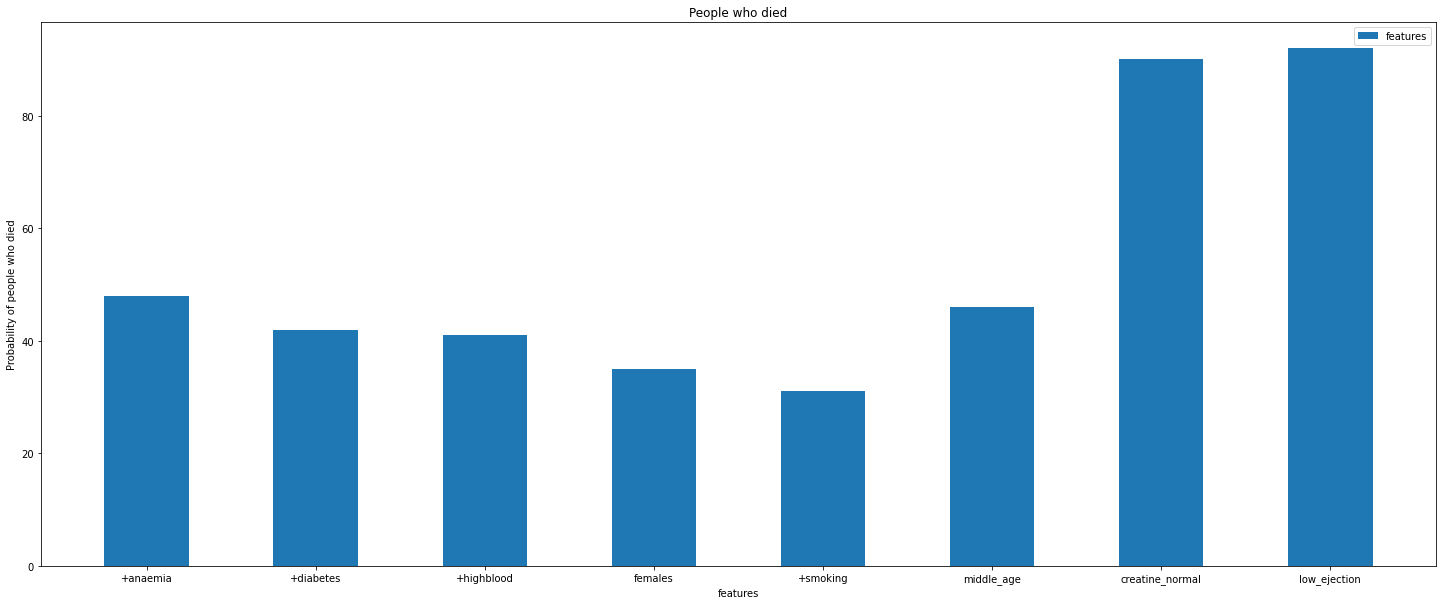

In [10]:
# trim data to only people who died
death_data = data[data.DEATH_EVENT != 0]

# number of deaths in each feature
number_of_deaths = len(death_data)
positive_anaemia = len(death_data[death_data.anaemia != 0])
positive_diabetes = len(death_data[death_data.diabetes != 0])
positive_highblood = len(death_data[death_data.high_blood_pressure != 0])
positive_gender = len(death_data[death_data.gender != 1])#females
positive_smoking = len(death_data[death_data.smoking != 0])
positive_middle_age = len(death_data[death_data.age != 2])
positive_old_age = len(death_data[death_data.age == 2])
positive_creatine_normal = len(death_data[death_data.creatine_phosphokinase != 2])
positive_creatine_high = len(death_data[death_data.creatine_phosphokinase == 2])
positive_low_ejection = len(death_data[death_data.ejection_fraction != 2])
positive_normal_ejection= len(death_data[death_data.ejection_fraction == 2])

# probability of deaths for each feature
probability_anaemia = round((positive_anaemia/number_of_deaths)*100)
probability_diabetes = round((positive_diabetes/number_of_deaths)*100)
probability_highblood = round((positive_highblood/number_of_deaths)*100)
probability_gender = round((positive_gender/number_of_deaths)*100)

probability_smoking = round((positive_smoking/number_of_deaths)*100)
probability_middle_age = round((positive_middle_age/number_of_deaths)*100)
probability_old_age = round((positive_old_age/number_of_deaths)*100)
probability_creatine_normal = round((positive_creatine_normal/number_of_deaths)*100)
probability_creatine_high = round((positive_creatine_high/number_of_deaths)*100)
probability_low_ejection = round((positive_low_ejection/number_of_deaths)*100)
probability_normal_ejection = round((positive_normal_ejection/number_of_deaths)*100)

# plotting the graph, bar graph of the pobabilities of people who died for each feature.
N = 8 # There's 8 bars for our graph

#data on y-axis
bar = (probability_anaemia, probability_diabetes, probability_highblood, probability_gender, 
       probability_smoking, probability_middle_age, probability_creatine_normal,
       probability_low_ejection)

#position of bars on x-axis
index = np.arange(N)

#figure size, how big the image of the graph is.
plt.figure(figsize=(25,10))

# width of bar
width = 0.5

#plotting
plt.bar(index, bar, width, label='features')

plt.xlabel('features')
plt.ylabel('Probability of people who died')
plt.title('People who died')

# xticks(), labels on the x-axis
# First argument(index) - A list of positions at which ticks should be placed
# Second argument(labels) -  A list of labels to place at the given x-positions
plt.xticks(index , ('+anaemia', '+diabetes', '+highblood', 'females', 
       '+smoking', 'middle_age', 'creatine_normal',
       'low_ejection'))

# Finding the best position for legends(heading, x-axis label and y- axis label) and putting it
plt.legend(loc='best')
plt.show()


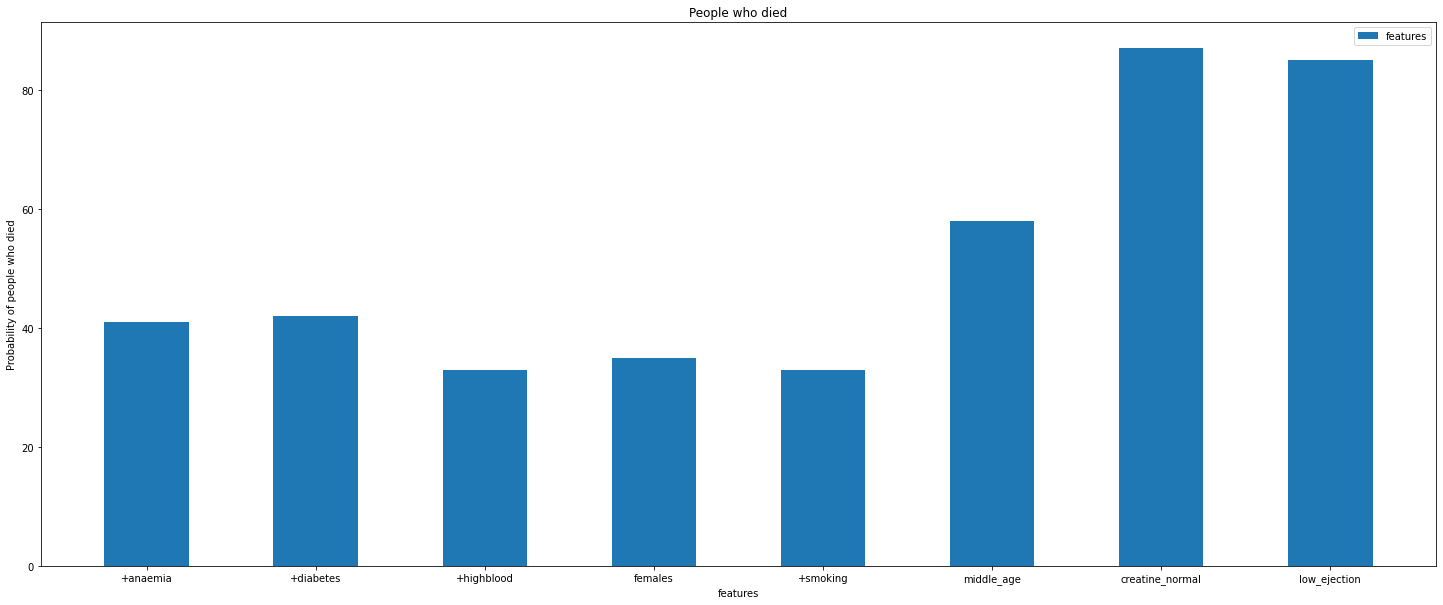

In [11]:
# trim data to only people who are alive
alive_data = data[data.DEATH_EVENT != 1]

# number of people who are alive in each feature
number_of_alive = len(alive_data)
positive_anaemia = len(alive_data[alive_data.anaemia != 0])
positive_diabetes = len(alive_data[alive_data.diabetes != 0])
positive_highblood = len(alive_data[alive_data.high_blood_pressure != 0])
positive_gender = len(alive_data[alive_data.gender != 1])#females
positive_smoking = len(alive_data[alive_data.smoking != 0])
positive_middle_age = len(alive_data[alive_data.age != 2])
positive_old_age = len(alive_data[alive_data.age == 2])
positive_creatine_normal = len(alive_data[alive_data.creatine_phosphokinase != 2])
positive_creatine_high = len(alive_data[alive_data.creatine_phosphokinase == 2])
positive_low_ejection = len(alive_data[alive_data.ejection_fraction != 2])
positive_normal_ejection= len(alive_data[alive_data.ejection_fraction == 2])

# probability of people who are alive
probability_anaemia = round((positive_anaemia/number_of_alive)*100)
probability_diabetes = round((positive_diabetes/number_of_alive)*100)
probability_highblood = round((positive_highblood/number_of_alive)*100)
probability_gender = round((positive_gender/number_of_alive)*100)

probability_smoking = round((positive_smoking/number_of_alive)*100)
probability_middle_age = round((positive_middle_age/number_of_alive)*100)
probability_old_age = round((positive_old_age/number_of_alive)*100)
probability_creatine_normal = round((positive_creatine_normal/number_of_alive)*100)
probability_creatine_high = round((positive_creatine_high/number_of_alive)*100)
probability_low_ejection = round((positive_low_ejection/number_of_alive)*100)
probability_normal_ejection = round((positive_normal_ejection/number_of_alive)*100)

# plotting the graph
N = 8 # There's 8 bars.

#data on y-axis
bar = (probability_anaemia, probability_diabetes, probability_highblood, probability_gender, 
       probability_smoking, probability_middle_age, probability_creatine_normal,
       probability_low_ejection)

#position of bars on x-axis
index = np.arange(N)

#figure size
plt.figure(figsize=(25,10))

# width of bar
width = 0.5

#plotting
plt.bar(index, bar, width, label='features')

plt.xlabel('features')
plt.ylabel('Probability of people who died')
plt.title('People who died')

# xticks(), labels on the x-axis
# First argument(index) - A list of positions at which ticks should be placed
# Second argument(labels) -  A list of labels to place at the given x-positions
plt.xticks(index , ('+anaemia', '+diabetes', '+highblood', 'females', 
       '+smoking', 'middle_age', 'creatine_normal',
       'low_ejection'))

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.show()


# Splitting into training, validation and testing data

In [12]:
# Taking the first 180 data points as the training data
training_data = data[:180]
training_data.head()

,age,anaemia,creatine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,gender,smoking,DEATH_EVENT
0,2,0,1,0,0,1,1,0,1
1,1,0,2,0,0,0,1,0,1
2,2,0,0,0,0,0,1,1,1
3,0,1,0,0,0,0,1,0,1
4,2,1,0,1,0,0,0,0,1


In [13]:
# Taking the data points at position 180 to position 240 as the testing data
testing_data = data[180:240]
testing_data.tail()

,age,anaemia,creatine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,gender,smoking,DEATH_EVENT
235,2,1,0,0,1,1,1,0,0
236,2,0,0,0,1,1,1,0,0
237,2,0,1,0,0,0,1,0,0
238,2,1,1,1,0,0,0,0,0
239,1,1,0,0,1,0,1,1,0


In [14]:
# Taking the data points at position 240 to the last position as the training data
validation_data = data[240:]
validation_data.tail()

,age,anaemia,creatine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,gender,smoking,DEATH_EVENT
294,2,0,0,1,0,1,1,1,0
295,1,0,2,0,0,0,0,0,0
296,0,0,2,1,2,0,0,0,0
297,0,0,2,0,0,0,1,1,0
298,0,0,0,0,1,0,1,1,0


# Naive Bayes Algorithm

## Training For DEATH_EVENT == 1

In [15]:
# Applying the algorithm to the training data.
probability_death = len(training_data[training_data.DEATH_EVENT==1])/len(training_data)
death_data = training_data[training_data.DEATH_EVENT != 0]

bayes_theorem_death_probabilities = {}
for i in training_data:
    store_probabilities = []
    
    frequency = pd.crosstab(index=training_data[i], columns='counts')    
    
    for counter in range(len(frequency)):
        if i != 'DEATH_EVENT': 
            frequency_death = pd.crosstab(index=death_data[i], columns='counts')
        else:
            break
        
        probability_conditional = frequency_death.counts[counter]/len(death_data) #P(attribute|death)
        probability_attribute = frequency.counts[counter]/len(training_data) #P(attribute)
        
        #Bayes Theorem P(death|attribute) = P(attribute|death)*P(death)/P(attribute)
        bayes_theorem_death = (probability_conditional*probability_death)/probability_attribute
        storage = store_probabilities.append(bayes_theorem_death)
        #print(frequency_death)
    bayes_theorem_death_probabilities[i] = store_probabilities
print(bayes_theorem_death_probabilities)


{'age': [0.41025641025641024, 0.3333333333333333, 0.528735632183908], 'anaemia': [0.43617021276595735, 0.4534883720930232], 'creatine_phosphokinase': [0.4146341463414634, 0.49367088607594933, 0.36842105263157887], 'diabetes': [0.42201834862385323, 0.47887323943661975], 'ejection_fraction': [0.507936507936508, 0.34615384615384615, 0.24999999999999994], 'high_blood_pressure': [0.4205607476635514, 0.47945205479452047], 'gender': [0.46774193548387094, 0.4322033898305084], 'smoking': [0.4576271186440678, 0.4193548387096774], 'DEATH_EVENT': []}


## Training For DEATH_EVENT == 0

In [16]:
# Applying the algorithm to the training data.
probability_alive = len(training_data[training_data.DEATH_EVENT==0])/len(training_data)
alive_data = training_data[training_data.DEATH_EVENT != 0]

bayes_theorem_alive_probabilities = {}
for i in training_data:
    store_probabilities = []
    
    frequency = pd.crosstab(index=training_data[i], columns='counts')    
    
    for counter in range(len(frequency)):
        if i != 'DEATH_EVENT': 
            frequency_alive = pd.crosstab(index=death_data[i], columns='counts')
        else:
            break
        
        probability_conditional = frequency_alive.counts[counter]/len(alive_data) #P(attribute|death)
        probability_attribute = frequency.counts[counter]/len(training_data) #P(attribute)
        
        #Bayes Theorem P(alive|attribute) = P(attribute|alive)*P(alive)/P(attribute)
        bayes_theorem_alive = (probability_conditional*probability_alive)/probability_attribute
        storage = store_probabilities.append(bayes_theorem_alive)
        #print(frequency_alive)
    bayes_theorem_alive_probabilities[i] = store_probabilities
print(bayes_theorem_alive_probabilities)


{'age': [0.5128205128205129, 0.4166666666666667, 0.660919540229885], 'anaemia': [0.5452127659574467, 0.566860465116279], 'creatine_phosphokinase': [0.5182926829268293, 0.6170886075949367, 0.4605263157894737], 'diabetes': [0.5275229357798165, 0.5985915492957746], 'ejection_fraction': [0.634920634920635, 0.4326923076923077, 0.3125], 'high_blood_pressure': [0.5257009345794392, 0.5993150684931507], 'gender': [0.5846774193548387, 0.5402542372881356], 'smoking': [0.5720338983050848, 0.5241935483870969], 'DEATH_EVENT': []}


# Testing the algorithm

In [18]:
# Predicting the results using our model.
probability_death_testingdata = len(testing_data[testing_data.DEATH_EVENT==1])/len(testing_data)
probability_alive_testingdata = len(testing_data[testing_data.DEATH_EVENT==0])/len(testing_data)

counter = 0

for row in range(len(testing_data)):
    probability_death = 1
    for feature in bayes_theorem_death_probabilities:
        if feature != 'DEATH_EVENT':
            feature_probability_death = bayes_theorem_death_probabilities[feature][testing_data[feature][row + len(training_data)]]#get the feature inside 
            probability_death = probability_death*feature_probability_death
            
    probability_alive = 1
    for feature in bayes_theorem_alive_probabilities:
        if feature != 'DEATH_EVENT':
            feature_probability_alive = bayes_theorem_alive_probabilities[feature][testing_data[feature][row + len(training_data)]]#get the feature inside 
            probability_alive = probability_alive*feature_probability_alive

    bayes_theorem_death = probability_death*probability_death_testingdata
    bayes_theorem_alive = probability_alive*probability_alive_testingdata
    
    bayes_theorem_death_normalised = round(bayes_theorem_death/(bayes_theorem_death + bayes_theorem_alive)*100)
    bayes_theorem_alive_normalised = round(bayes_theorem_alive/(bayes_theorem_alive + bayes_theorem_death)*100)   
        
    if bayes_theorem_death_normalised > bayes_theorem_alive_normalised and testing_data['DEATH_EVENT'][row + len(training_data)]==1:
        counter = counter + 1
        
    if bayes_theorem_alive_normalised > bayes_theorem_death_normalised and testing_data['DEATH_EVENT'][row + len(training_data)]==0:
        counter = counter + 1
        
    accuracy = counter/len(testing_data)*100
print('accuracy = ', accuracy)

accuracy =  78.33333333333333


# Validation

In [20]:
# Predicting the results using our model.
probability_death_validationdata = len(validation_data[validation_data.DEATH_EVENT==1])/len(validation_data)
probability_alive_validationdata = len(validation_data[validation_data.DEATH_EVENT==0])/len(validation_data)

counter = 0

for row in range(len(validation_data)):
    probability_death = 1
    for feature in bayes_theorem_death_probabilities:
        if feature != 'DEATH_EVENT':
            feature_probability_death = bayes_theorem_death_probabilities[feature][validation_data[feature][row + len(training_data) + len(testing_data)]]#get the feature inside 
            probability_death = probability_death*feature_probability_death
            
    probability_alive = 1
    for feature in bayes_theorem_alive_probabilities:
        if feature != 'DEATH_EVENT':
            feature_probability_alive = bayes_theorem_alive_probabilities[feature][validation_data[feature][row + len(training_data) + len(testing_data)]]#get the feature inside 
            probability_alive = probability_alive*feature_probability_alive

    bayes_theorem_death = probability_death*probability_death_validationdata
    bayes_theorem_alive = probability_alive*probability_alive_validationdata
    
    bayes_theorem_death_normalised = round(bayes_theorem_death/(bayes_theorem_death + bayes_theorem_alive)*100)
    bayes_theorem_alive_normalised = round(bayes_theorem_alive/(bayes_theorem_alive + bayes_theorem_death)*100)   
        
    if bayes_theorem_death_normalised > bayes_theorem_alive_normalised and validation_data['DEATH_EVENT'][row + len(training_data)]==1:
        counter = counter + 1
        
    if bayes_theorem_alive_normalised > bayes_theorem_death_normalised and validation_data['DEATH_EVENT'][row + len(training_data)]==0:
        counter = counter + 1
        
    accuracy = counter/len(validation_data)*100
print(accuracy)

KeyError: 180